In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
import numpy as np
import torch
import torchvision

from matplotlib import pyplot as plt

from train import FacadesDataset

In [13]:
image_width, image_height, = 256, 256
batch_size = 64

In [14]:
transforms = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((268, 268)),
        torchvision.transforms.RandomCrop((image_width, image_height)),
        torchvision.transforms.Lambda(lambda img: (np.array(img) / 127.5) - 1),
        torchvision.transforms.ToTensor(),
    ]
)

train_set = FacadesDataset(root="data/facades/train", transforms=transforms)
val_set = FacadesDataset(root="data/facades/val", transforms=transforms)
test_set = FacadesDataset(root="data/facades/test", transforms=transforms)

train_loader = torch.utils.data.DataLoader(
    dataset=train_set, batch_size=batch_size, shuffle=True, num_workers=0
)

val_loader = torch.utils.data.DataLoader(
    dataset=val_set, batch_size=batch_size, shuffle=False, num_workers=0
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_set, batch_size=batch_size, shuffle=False, num_workers=0
)

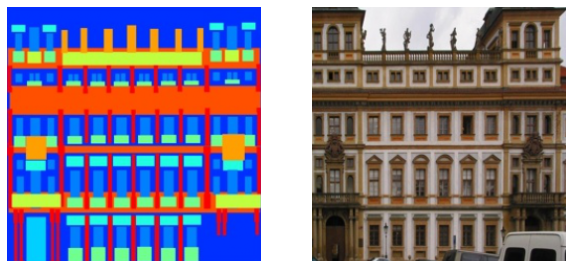

In [17]:
src_imgs, tgt_imgs = next(iter(train_loader))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 9))
ax1.axis("off")
ax2.axis("off")
ax1.imshow(np.transpose((src_imgs[0]+1)/2, (1, 2, 0)))
ax2.imshow(np.transpose((tgt_imgs[0]+1)/2, (1, 2, 0)));